In [ ]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from sklearn import feature_extraction

In [ ]:
pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 7.8 MB/s 


In [ ]:
import mpld3

In [ ]:
titles = open('titles.txt').read().split('\n')

links = open('movielinks.txt').read().split('\n')

synopses_wiki = open('synopses4movies.txt').read().split('\n BREAKS HERE')

synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)

synopses_wiki = synopses_clean_wiki
    
    
genres = open('genres.txt').read().split('\n')

synopses_wiki = synopses_wiki[:100]

In [ ]:
synopses_imdb = open('synopsesfromimdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)

synopses_imdb = synopses_clean_imdb
len(synopses_imdb)

100

In [ ]:
synopses = []

for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)
synopses

In [ ]:
ranks = [i for i in range(0,len(titles))]


In [ ]:
import nltk



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
stemmer

In [ ]:
def tokenize_and_stem(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
      for word in nltk.word_tokenize(sent):
        tokens.append(word)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
len(totalvocab_stemmed)

312302

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame.loc['plot'].values.tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

tfidf_matrix


<100x563 sparse matrix of type '<class 'numpy.float64'>'
	with 19907 stored elements in Compressed Sparse Row format>

In [ ]:
terms = tfidf_vectorizer.get_feature_names()
len(terms)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


563

In [ ]:
terms

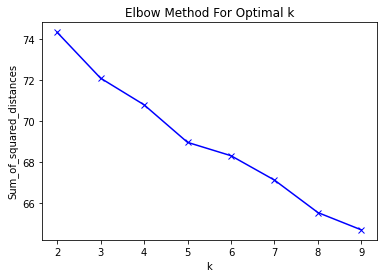

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfidf_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
clusters

In [ ]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

frame.head()

,rank,title,cluster,genre
2,0,The Godfather,2,"[u' Crime', u' Drama']"
1,1,The Shawshank Redemption,1,"[u' Crime', u' Drama']"
3,2,Schindler's List,3,"[u' Biography', u' Drama', u' History']"
2,3,Raging Bull,2,"[u' Biography', u' Drama', u' Sport']"
3,4,Casablanca,3,"[u' Drama', u' Romance', u' War']"


In [ ]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids
type(order_centroids)
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: car, police, apartments, driving, meet, house,

Cluster 0 titles: Titanic, Psycho, Sunset Blvd., Vertigo, Forrest Gump, E.T. the Extra-Terrestrial, 2001: A Space Odyssey, Chinatown, Amadeus, Gandhi, The Apartment, The French Connection, Annie Hall, Out of Africa, Good Will Hunting, Fargo, Close Encounters of the Third Kind, Network, Nashville, The Graduate, American Graffiti, Pulp Fiction, The Maltese Falcon, Taxi Driver, Wuthering Heights, Double Indemnity, Rear Window, The Third Man, North by Northwest,

Cluster 1 words: prison, john, office, guarding, family, sister,

Cluster 1 titles: The Shawshank Redemption, The Silence of the Lambs, The Bridge on the River Kwai, Ben-Hur, Goodfellas, The Green Mile, A Clockwork Orange,

Cluster 2 words: father, family, fights, home, new, friends,

Cluster 2 titles: The Godfather, Raging Bull, Gone with the Wind, Citizen Kane, The Wizard of Oz, The Godfather: Part II, On the Waterfront, West Side Story, Sin